In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterio.features

##### data

In [3]:
project_dir = '/home/biserhong/projects/viziazasofia2018/' 

In [4]:
buildings = gpd.read_file(os.path.join(project_dir, 'data/_ready/Cadaster_Buildings/04_buildings_UTM34N.shp'))

In [5]:
density = gpd.read_file(os.path.join(project_dir, 'data/sofiasportuva/KVARTALITE.geojson'))

In [6]:
dem_buildings = rasterio.open(os.path.join(project_dir, 'data/_ready/Building_Height/BG001L2_SOFIA_UA2012_DHM.tif'))

In [7]:
dem_sofia = rasterio.open(os.path.join(project_dir, 'data/_ready/DEM/EU_DEM_CLIP.tif'))

##### reproject to common crs

In [10]:
buildings.crs

{'init': 'epsg:32634'}

In [11]:
density.crs

{'init': 'epsg:3857'}

In [12]:
dem_buildings.crs

CRS({'proj': 'laea', 'lat_0': 52, 'lon_0': 10, 'x_0': 4321000, 'y_0': 3210000, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True})

In [8]:
buildings_reprj = buildings.to_crs(dem_buildings.crs.copy())

In [9]:
density_reprj = density.to_crs(dem_buildings.crs.copy())

In [15]:
density_reprj

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,AgeOver65,Educ1,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry
0,Зона за отдих Шишмановски манастир,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6.520429e+05,716220.394138,4.701659e+06,(POLYGON ((5437951.568225639 2249553.229623955...
1,в.з. Татарски брод,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.722835e+05,709933.138737,4.701578e+06,(POLYGON ((5432248.680745812 2248202.610253535...
2,"Панчарево, в.з.Лавандулите",Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4.528326e+05,711336.648877,4.702379e+06,(POLYGON ((5434189.977335217 2248734.472556552...
3,Манастир Св. Илия,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.408295e+05,715154.742684,4.706243e+06,(POLYGON ((5437205.394589243 2253945.558828178...
4,"Панчарево, в.з. Щъркелово гнездо",Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.055968e+06,709588.733528,4.704446e+06,(POLYGON ((5432124.651688129 2252328.326526682...
5,Хидропарк Искър - Вододайна зона яз. Искър,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.017977e+08,712536.138938,4.704868e+06,(POLYGON ((5429755.241535044 2258332.976030454...
6,м. Пасарел,Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.518576e+06,708294.324084,4.707825e+06,(POLYGON ((5430078.652026254 2253766.177299064...
7,с. Плана,Панчарево,С.ПЛАНА,5,6,2,3,0,0,0,...,2,0,0,0,0,0,2.706065e+06,697850.733561,4.706528e+06,(POLYGON ((5419784.732510517 2252631.686653797...
8,"с. Железница, в.з. Звездана (Църквище)",Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.516804e+05,694341.576032,4.707703e+06,(POLYGON ((5416902.292680452 2252010.543397754...
9,"с. Железница, в.з. Елата - Кошарите",Панчарево,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.196605e+06,695605.991051,4.708232e+06,(POLYGON ((5417596.398026059 2253500.127830587...


##### analysis

In [150]:
buildings.shape

(268318, 2)

In [14]:
buildings.loc[:3].geometry.area

0    37.473554
1    85.516398
2    93.449801
3    71.182499
dtype: float64

In [4]:
density.shape

(574, 23)

In [9]:
density[density['Rajon'] == 'Лозенец']

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,AgeOver65,Educ1,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry
106,Парк -Борисова градина - разш. Кръстова вада,Лозенец,ГР.СОФИЯ,87,52,43,44,22,6,18,...,5,38,14,0,6,11,1.155530e+06,690395.147984,4.724220e+06,(POLYGON ((2596857.539026654 5259814.923131695...
107,кв. Витоша - Лозенец,Лозенец,ГР.СОФИЯ,4132,4164,2071,2061,742,495,1149,...,228,2019,822,102,126,337,1.877846e+06,691001.543299,4.724086e+06,(POLYGON ((2596158.783655309 5257813.366373418...
117,м. Зоопарк,Лозенец,ГР.СОФИЯ,135,70,61,74,14,21,27,...,16,61,29,8,3,8,3.466194e+05,691133.875789,4.725532e+06,(POLYGON ((2597401.971094168 5259706.883996177...
124,кв. Хладилника,Лозенец,ГР.СОФИЯ,4252,2597,1990,2262,665,436,852,...,563,2241,1012,161,185,314,1.814350e+05,689744.606540,4.725828e+06,"(POLYGON ((2595580.065303168 5260257.40926678,..."
135,НПЗ Хладилника,Лозенец,ГР.СОФИЯ,342,211,148,194,31,37,47,...,90,146,114,11,9,14,1.056971e+06,690352.764690,4.725863e+06,"(POLYGON ((2596859.151288128 5259844.92733043,..."
139,Борисова градина - Погребите част 1,Лозенец,ГР.СОФИЯ,15,8,7,8,1,1,3,...,3,7,7,0,0,0,7.856083e+05,691191.356286,4.726278e+06,(POLYGON ((2597742.842473065 5262249.795310442...
150,м. Лозенец част 2 и 3 - юг,Лозенец,ГР.СОФИЯ,10769,6039,4935,5834,1269,1278,1716,...,2214,5442,3147,465,359,509,8.714623e+05,690678.355861,4.726880e+06,(POLYGON ((2597737.782574491 5262243.768580187...
155,м. Лозенец част 2 - север,Лозенец,ГР.СОФИЯ,3087,1655,1395,1692,318,319,470,...,705,1648,827,92,77,67,3.818697e+05,690610.509226,4.727449e+06,(POLYGON ((2597499.497581656 5262835.552446553...
164,Борисова градина - Семинарията,Лозенец,ГР.СОФИЯ,71,53,48,23,3,12,12,...,21,39,15,10,0,0,4.110908e+05,691459.806532,4.727656e+06,(POLYGON ((2597750.598689584 5262285.853803734...
175,м. Лозенец част 3,Лозенец,ГР.СОФИЯ,10886,6339,4982,5904,1148,1029,1794,...,2440,5864,2871,154,205,230,8.472019e+05,690754.412771,4.728088e+06,(POLYGON ((2597712.064763138 5263769.744523342...


In [23]:
loz = density[density['Rajon'] == 'Лозенец']

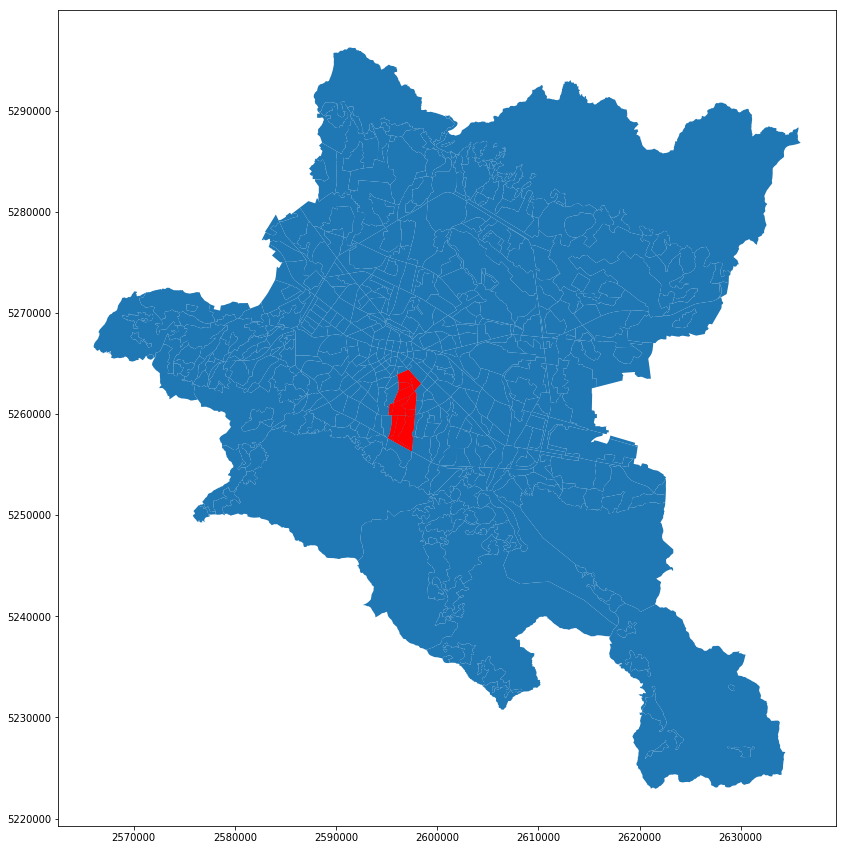

In [24]:
f, ax = plt.subplots(1, figsize=(15, 15))

base = density.geometry.plot(ax=ax)
loz.geometry.plot(ax=base, color='red')

##### vector data

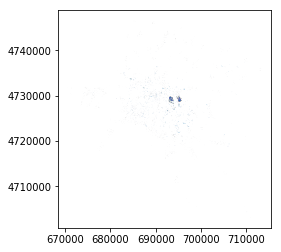

In [92]:
buildings.loc[:10000].geometry.plot()

##### buildings by neighbourhood

In [211]:
density.columns

Index(['RegName', 'Rajon', 'NSettlemen', 'Broi_Lica', 'Broi_Jil', 'Male',
       'Female', 'Age0_14', 'Age15_24', 'Age25_34', 'Age35_44', 'Age45_54',
       'Age55_64', 'AgeOver65', 'Educ1', 'Educ2', 'Educ3', 'Educ4', 'Educ5',
       'Area_m2', 'X', 'Y', 'geometry'],
      dtype='object')

In [9]:
density.crs

{'init': 'epsg:3857'}

In [10]:
cutoffs = np.append(np.arange(0, buildings_reprj.shape[0], 10000), buildings_reprj.shape[0] + 1)[1:]

In [11]:
buildings_reprj_s = buildings_reprj.loc[0:9999]

buildings_join = gpd.sjoin(buildings_reprj_s, density_reprj[['RegName', 'Rajon', 'geometry']], how='left')

for c1, c2 in zip(cutoffs, cutoffs[1:]):
    buildings_reprj_s = buildings_reprj.loc[c1:c2 - 1]
    cur_join = gpd.sjoin(buildings_reprj_s, density_reprj[['RegName', 'Rajon', 'geometry']], how='left')
    buildings_join = buildings_join.append(cur_join)
    print(c2, buildings_join.shape)

20000 (20063, 5)
30000 (30105, 5)
40000 (40177, 5)
50000 (50232, 5)
60000 (60270, 5)
70000 (70315, 5)
80000 (80337, 5)
90000 (90367, 5)
100000 (100407, 5)
110000 (110443, 5)
120000 (120486, 5)
130000 (130527, 5)
140000 (140563, 5)
150000 (150615, 5)
160000 (160670, 5)
170000 (170727, 5)
180000 (180779, 5)
190000 (190808, 5)
200000 (200894, 5)
210000 (210940, 5)
220000 (220990, 5)
230000 (231037, 5)
240000 (241072, 5)
250000 (251107, 5)
260000 (261137, 5)
268319 (269487, 5)


In [49]:
buildings_by_neighbourhood.to_csv(os.path.join(project_dir, 'buildings_by_neighbourhood.csv'))

In [13]:
buildings_join.to_file(os.path.join(project_dir, 'data/buildings_join.shp'))

/home/biserhong/projects/viziazasofia2018/venv/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [20]:
buildings_by_neighbourhood = \
    buildings_join.groupby(['RegName']).agg({'RegName': 'count'}).sort_values(['RegName'], ascending=False)

buildings_by_neighbourhood

/home/biserhong/projects/viziazasofia2018/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'RegName' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,RegName
RegName,
ж.к. Орландовци-Малашевци,8167
ж.к. Факултета,4417
гр. Нови Искър - кв. Курило,4309
кв. Драгалевци,4245
кв. Симеоново,4060
кв. Враждебна,3808
гр. Банкя,3709
с. Бистрица,3656
кв. Горубляне,3546


Text(0.5, 1.0, 'Distribution of buildings by neighbourhood')

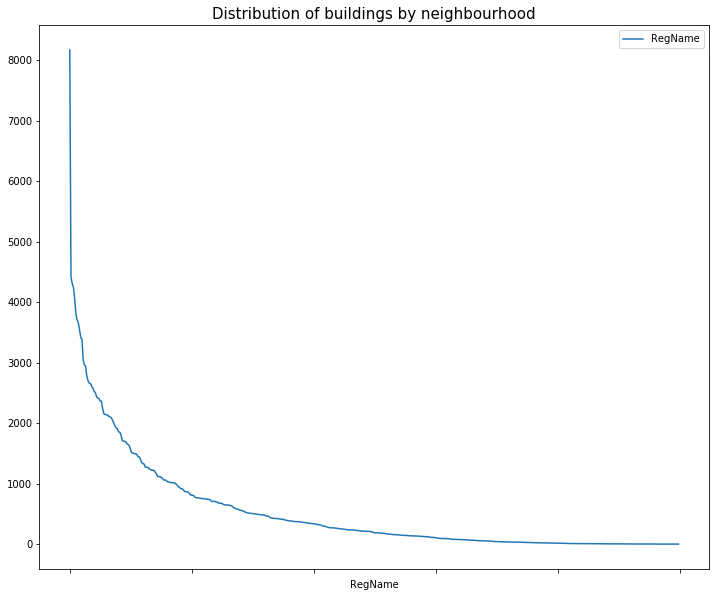

In [63]:
f, ax = plt.subplots(1, figsize=(12, 10))

buildings_by_neighbourhood.plot(ax=ax)
ax.set_title('Distribution of buildings by neighbourhood', fontsize=15)

In [80]:
cols = buildings_by_neighbourhood.columns.values
cols[0] = 'num'
buildings_by_neighbourhood.columns = cols

In [82]:
buildings_by_neighbourhood['cumsum'] = buildings_by_neighbourhood.cumsum()
buildings_by_neighbourhood['cumperc'] = buildings_by_neighbourhood['cumsum']/buildings_by_neighbourhood['num'].sum()

In [85]:
buildings_by_neighbourhood = buildings_by_neighbourhood.reset_index()

In [89]:
buildings_by_neighbourhood['order'] = range(1, buildings_by_neighbourhood.shape[0] + 1)

In [91]:
buildings_by_neighbourhood['perc_neighb'] = buildings_by_neighbourhood['order']/buildings_by_neighbourhood.shape[0]

Text(0.5, 1.0, 'Distribution of buildings by neighbourhood')

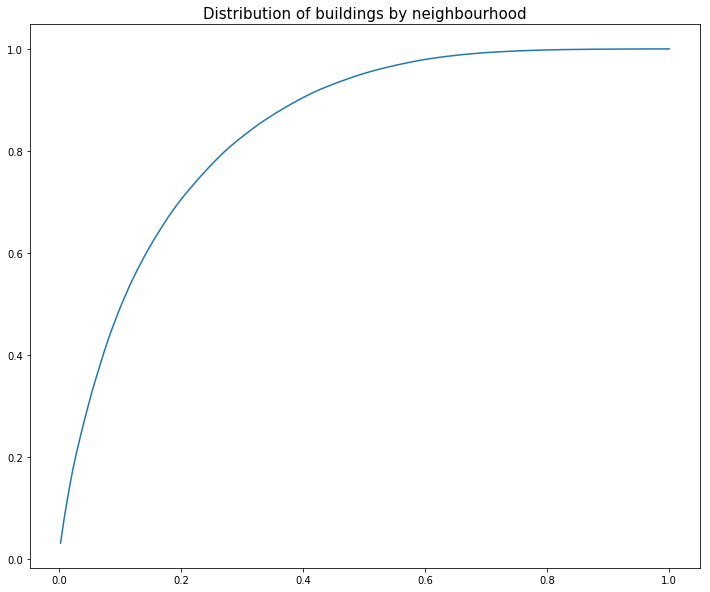

In [92]:
f, ax = plt.subplots(1, figsize=(12, 10))

ax.plot(buildings_by_neighbourhood['perc_neighb'], buildings_by_neighbourhood['cumperc'])
ax.set_title('Distribution of buildings by neighbourhood', fontsize=15)

In [104]:
perc_over_third = 1 - buildings_by_neighbourhood[buildings_by_neighbourhood['perc_neighb'] > 1/3]['cumperc'].iloc[0]

print('Percentage of buildings in the bottom 2/3 of neighbourhoods: {:.2f}%'.format(perc_over_third*100))

Percentage of buildings in the last 2/3 of the neighbourhoods: 14.21%


In [93]:
buildings_neighbs = buildings_join.RegName.value_counts().index.values
avail_neighbs = density_reprj.RegName.values

# neighbourhoods with no buildings in buildings shape file
no_build_neighbs = set(avail_neighbs).difference(buildings_neighbs)
print('Number of niegbourhoods without buildings {}'.format(len(no_build_neighbs)))

Number of niegbourhoods without buildings 62


### building areas 

In [124]:
areas = density_reprj.set_index('RegName')['Area_m2']

In [158]:
bbn = buildings_by_neighbourhood.set_index('RegName')
# add areas 
bbn = bbn.join(areas)

In [165]:
buildings_join['area'] = buildings_join.geometry.area

In [178]:
largest_twenty = buildings_join.sort_values(['area'], ascending=False).iloc[:20]

In [179]:
largest_twenty[['RegName', 'area']].reset_index()

,index,RegName,area
0,46188,НПЗ Искър-юг,81209.146892
1,267839,СПЗ Слатина-юг,54724.219372
2,103750,НПЗ Кремиковци,45321.021841
3,190053,Борисова градина - север,39548.261397
4,267512,в.з. Малинова доолина - запад,36403.805697
5,31370,СПЗ Модерно предградие - разширение,34736.443647
6,30852,НПЗ Кремиковци,34293.533911
7,180971,Складова зона Илиянци-Връбница,33787.846309
8,111949,Летищен к-с София,29891.299868
9,44684,ЦГЧ Зона Г8 част Триадица,29702.980076


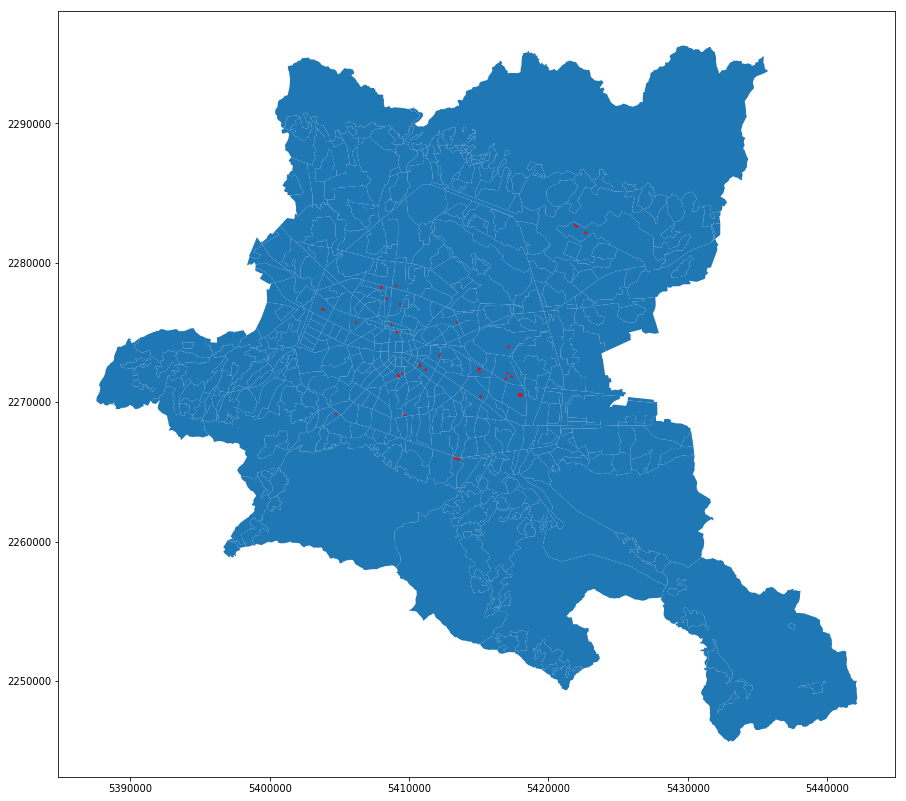

In [180]:
f, ax = plt.subplots(1, figsize=(15, 15))

base = density_reprj.geometry.plot(ax=ax)
largest_thirty.geometry.plot(ax=base, color='red')

### buildings per area

In [186]:
bbn_areas = bbn.join(buildings_join.groupby('RegName').agg({'area': 'sum'}))

In [224]:
bbn_areas['buildings_per_sq_meter'] = bbn_areas['num']/bbn_areas['Area_m2']*100

In [225]:
bbn_areas.sort_values('buildings_per_sq_meter', ascending=False)

,num,cumsum,cumperc,order,perc_neighb,Area_m2,area,buildings_per_sq_meter
RegName,,,,,,,,
с. Локорско,1116,165798,0.615238,75,0.150,5.070698e+04,89842.700441,2.200880
с. Локорско,1116,165798,0.615238,75,0.150,6.516477e+04,89842.700441,1.712582
ЦГЧ Зона Г6,811,190828,0.708118,101,0.202,1.002700e+05,154641.784435,0.808816
ЦГЧ Зона Г12,1055,171165,0.635154,80,0.160,1.866775e+05,212214.990320,0.565146
кв. Васил Левски - север,1347,147482,0.547271,60,0.120,3.840001e+05,73811.947153,0.350781
ж.к. Орландовци-Малашевци,8167,8167,0.030306,1,0.002,2.623903e+06,452137.012974,0.311254
ЦГЧ Зона Б2-3+,1222,157653,0.585014,68,0.136,4.001039e+05,165997.638658,0.305421
ЦГЧ Зона Г6,811,190828,0.708118,101,0.202,2.762251e+05,154641.784435,0.293601
ЦГЧ Зона Б3+,976,180278,0.668970,89,0.178,3.423726e+05,113972.833552,0.285070


In [226]:
neighbs = density_reprj.set_index('RegName')

neighbs = neighbs.join(bbn_areas[['buildings_per_sq_meter']])

In [227]:
neighbs[~neighbs.buildings_per_sq_meter.isna()]

,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,Age35_44,...,Educ1,Educ2,Educ3,Educ4,Educ5,Area_m2,X,Y,geometry,buildings_per_sq_meter
RegName,,,,,,,,,,,,,,,,,,,,,
3-та извънградска част,Средец,ГР.СОФИЯ,5394,3143,2459,2935,516,450,855,772,...,3011,1287,45,38,115,4.407548e+05,692099.466584,4.728828e+06,"(POLYGON ((5411826.71935729 2272379.307898853,...",0.160180
"Бенковски, м. Прогон",Кремиковци,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3.058270e+06,694468.039312,4.735101e+06,"(POLYGON ((5413044.059278607 2278307.13098496,...",0.000033
Бивши казарми ГУСВ м. Смърдан,Красна поляна,ГР.СОФИЯ,51,23,28,23,8,8,3,19,...,8,16,13,6,0,9.943381e+05,683372.186578,4.729100e+06,"(POLYGON ((5402788.62928659 2270985.534032209,...",0.025645
Бизнес зона бул .Източна тангента - Враждебна,Подуене / Кремиковци,ГР.СОФИЯ,21,6,11,10,5,2,0,8,...,6,4,4,3,0,8.195177e+05,696249.590425,4.731379e+06,(POLYGON ((5415397.730174299 2276651.221126539...,0.013178
Бистрица - резервата,Панчарево,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.338212e+05,693659.429908,4.719447e+06,"(POLYGON ((5414185.08522716 2264249.508502515,...",0.005042
Битпазар Малашевци,Подуене,ГР.СОФИЯ,190,64,103,87,40,30,27,24,...,0,22,23,25,7,7.303116e+05,692997.222999,4.732598e+06,(POLYGON ((5411687.665625577 2276046.557505883...,0.046008
Борисова градина - Ловен парк,Изгрев,ГР.СОФИЯ,11,5,7,4,4,2,2,1,...,0,0,0,3,0,3.851126e+05,691730.774636,4.726001e+06,"(POLYGON ((5411772.41213225 2270359.42679033, ...",0.008050
Борисова градина - Погребите част 1,Лозенец,ГР.СОФИЯ,15,8,7,8,1,1,3,3,...,7,7,0,0,0,7.856083e+05,691191.356286,4.726278e+06,(POLYGON ((5411113.208635941 2270999.139136439...,0.000636
Борисова градина - Семинарията,Лозенец,ГР.СОФИЯ,71,53,48,23,3,12,12,8,...,39,15,10,0,0,4.110908e+05,691459.806532,4.727656e+06,(POLYGON ((5411114.480126599 2271026.218888209...,0.009973


Text(0.5, 1.0, 'Number of buildings per 100 squares')

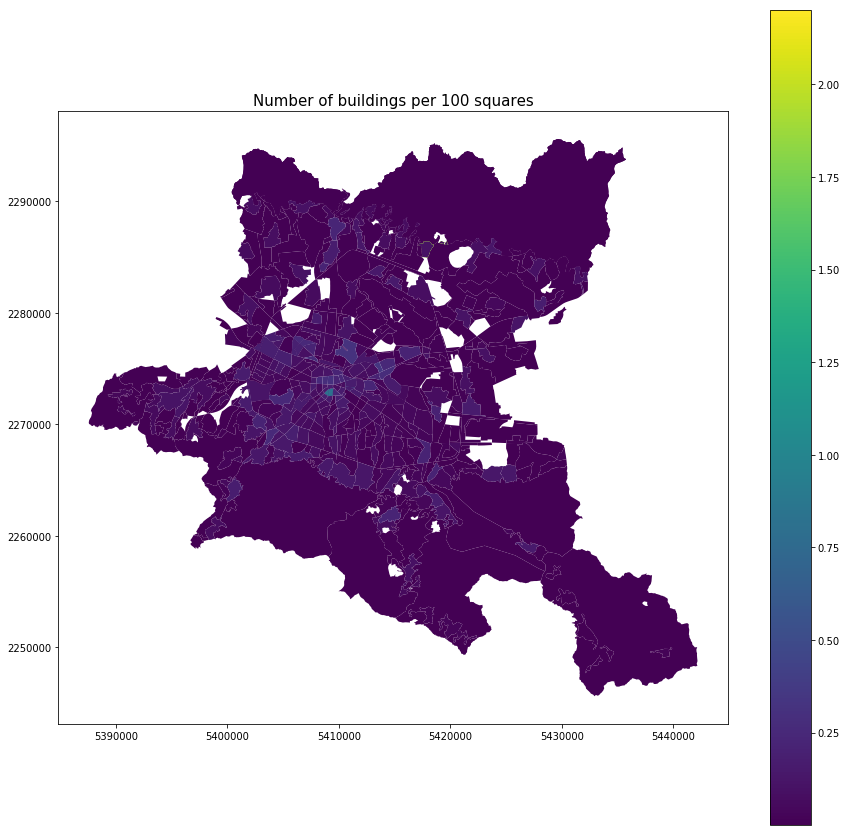

In [232]:
f, ax = plt.subplots(1, figsize=(15, 15))

base = neighbs[~neighbs.buildings_per_sq_meter.isna()].plot(column='buildings_per_sq_meter', ax=ax, legend=True)
base.set_title('Number of buildings per 100 squares', fontsize=15)

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 15))

base = neighbs[~neighbs.buildings_per_sq_meter.isna()].plot(column='buildings_per_sq_meter', ax=ax, legend=True)
base.set_title('Number of buildings per 100 squares', fontsize=15)

##### polygon map

In [152]:
buildings.crs

{'init': 'epsg:32634'}

In [153]:
dem_buildings.crs

CRS({'proj': 'laea', 'lat_0': 52, 'lon_0': 10, 'x_0': 4321000, 'y_0': 3210000, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True})

In [197]:
geom = buildings_reprj.loc[200000:201100, 'geometry']

In [159]:
buildings_reprj.loc[0]

OBJECTID                                                   41
geometry    POLYGON ((5414150.999241038 2273719.082449655,...
Name: 0, dtype: object

In [199]:
polygon_mask = rasterio.features.geometry_mask(geometries=geom,
                                               out_shape=(dem_buildings.height, dem_buildings.width),
                                               transform=dem_buildings.transform,
                                               all_touched=False,
                                               invert=True)


In [200]:
polygon_mask.sum()

938

In [182]:
geom.bounds

(5410618.804758843, 2274913.1961301807, 5410622.92726821, 2274916.5823951066)

In [205]:
dem_buildings.height*dem_buildings.width

12383560

In [203]:
dem_buildings.read(1)[dem_buildings.read(1)>0].sum()

5556348

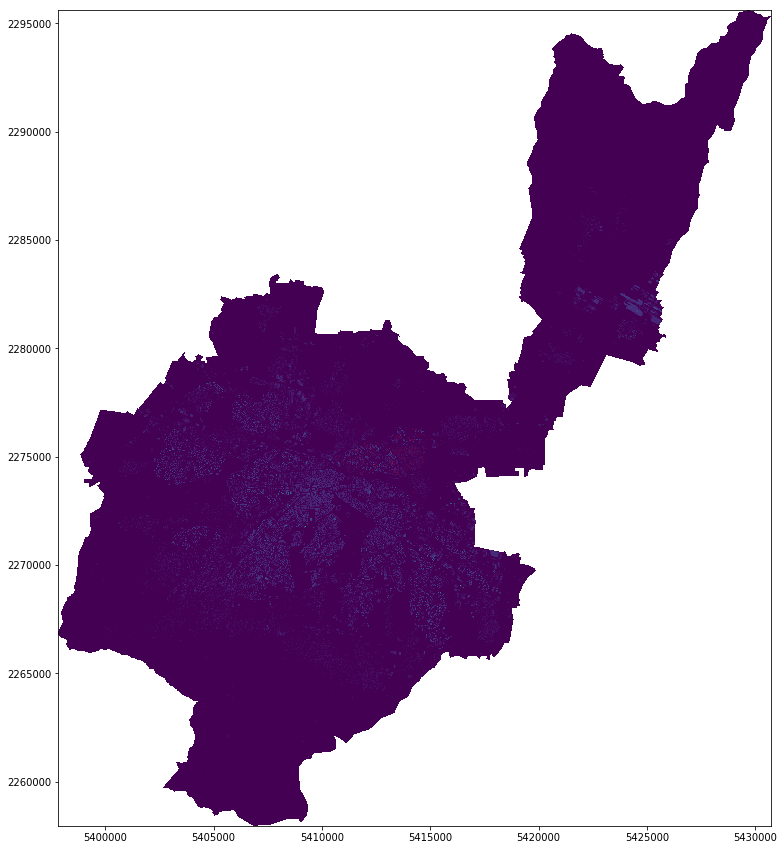

In [208]:
f, ax = plt.subplots(1, figsize=(15, 15))

base = rasterio.plot.show(dem_buildings, transform=dem_buildings.transform, ax=ax)
geom.plot(ax=base, color='red')

##### elevation map

In [41]:
topocmap = 'Spectral_r'
vmin = 180
vmax = 575

In [65]:
dem_raster = dem_buildings.read(1)

In [106]:
dem_buildings.indexes()

CRS({'proj': 'laea', 'lat_0': 52, 'lon_0': 10, 'x_0': 4321000, 'y_0': 3210000, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True})

In [105]:
dem_buildings.transform

Affine(10.0, 0.0, 5397840.0,
       0.0, -10.0, 2295600.0)

In [113]:
# Read the dataset's valid data mask as a ndarray.
mask = dem_buildings.dataset_mask()

# Extract feature shapes and values from the array.
for geom, val in rasterio.features.shapes(
        mask, transform=dem_buildings.transform):

    # Transform shapes from the dataset's own coordinate
    # reference system to CRS84 (EPSG:4326).
#         geom = rasterio.warp.transform_geom(
#             dem_buildings.crs, 'EPSG:4326', geom, precision=6)

    # Print GeoJSON shapes to stdout.
    geojson = geom

In [125]:
with open(os.path.join(project_dir, 'dem_buildings.geojson'), 'wt') as fl:
    fl.write(json.dumps(geojson))

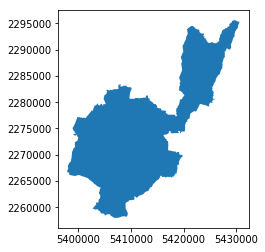

In [128]:
gpd.read_file(os.path.join(project_dir, 'dem_buildings.geojson')).plot()

In [60]:
dem_raster[dem_raster == -32767] = 0

In [63]:
def hillshade(array, azimuth, angle_altitude):

    # Source: http://geoexamples.blogspot.com.br/2014/03/shaded-relief-images-using-gdal-python.html

    x, y = np.gradient(array)
    slope = np.pi/2. - np.arctan(np.sqrt(x*x + y*y))
    aspect = np.arctan2(-x, y)
    azimuthrad = azimuth*np.pi / 180.
    altituderad = angle_altitude*np.pi / 180.


    shaded = np.sin(altituderad) * np.sin(slope) \
     + np.cos(altituderad) * np.cos(slope) \
     * np.cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2

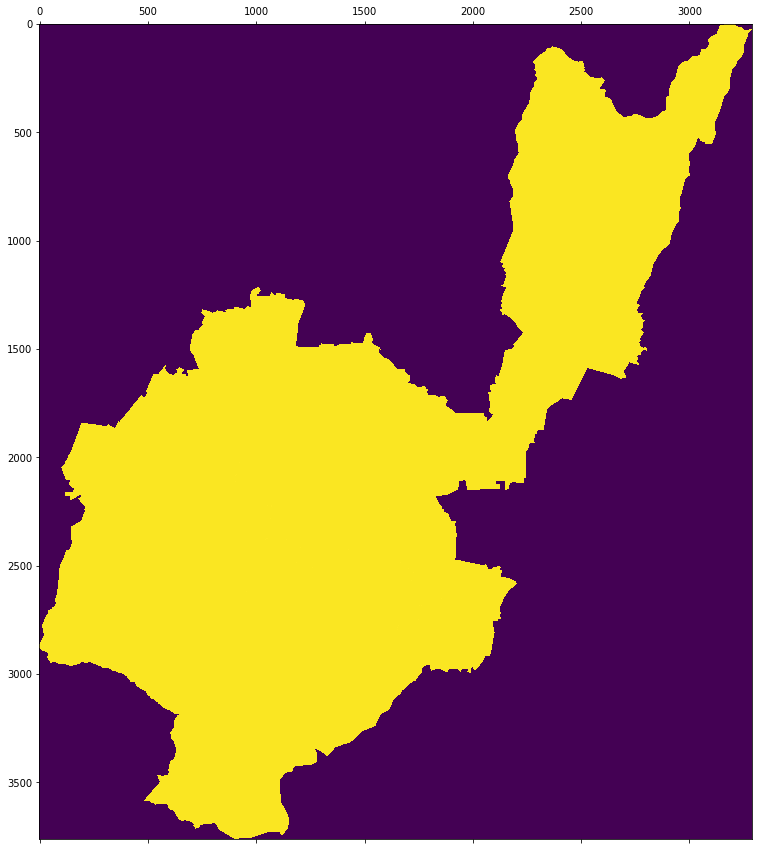

In [67]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.matshow(dem_raster)

In [76]:
dem_buildings_hs = hillshade(dem_raster, 30, 30)

In [79]:
dem_buildings_hs[2000:2500, 1000:1500]

array([[191.25      , 191.25      , 191.25      , ...,  91.92858138,
        151.38584317, 162.37586318],
       [191.25      , 191.25      , 191.25      , ...,  85.86029797,
         70.03233536,  67.93533342],
       [191.25      , 191.25      , 191.25      , ..., 169.34043452,
         35.79437211,  27.50797298],
       ...,
       [191.25      , 191.25      , 191.25      , ..., 191.25      ,
        191.25      , 191.25      ],
       [191.25      , 191.25      , 191.25      , ..., 191.25      ,
        191.25      , 191.25      ],
       [191.25      , 191.25      , 191.25      , ..., 191.25      ,
        191.25      , 191.25      ]])

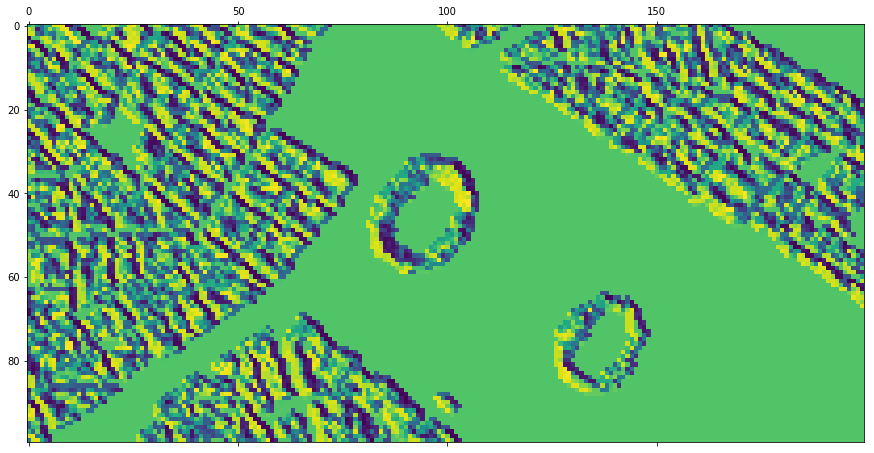

In [81]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.matshow(dem_buildings_hs[2250:2350, 1200:1400])

In [69]:
dem_sofia_raster = dem_sofia.read(1)

In [73]:
dem_sofia_raster.max()

2277.2715

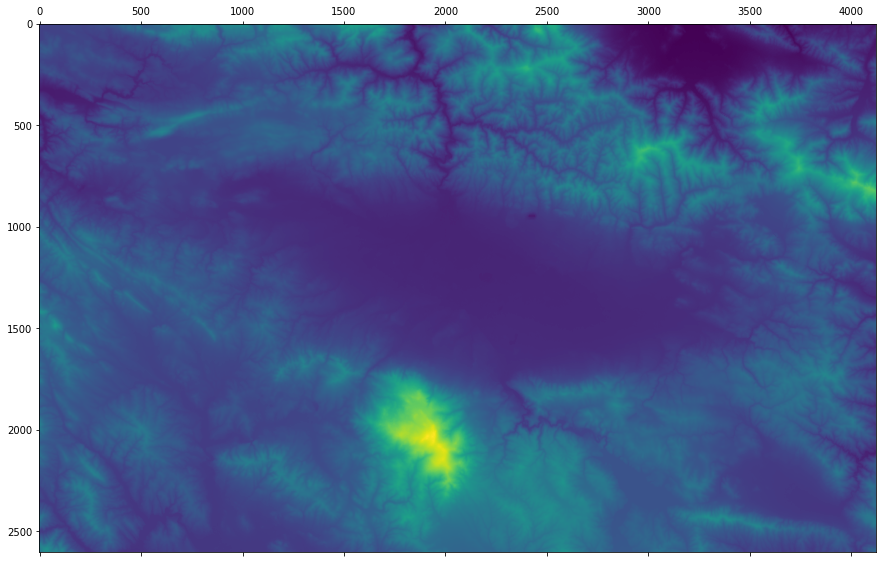

In [72]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.matshow(dem_sofia_raster)

In [74]:
dem_sofia_hs = hillshade(dem_sofia_raster, 30, 30)

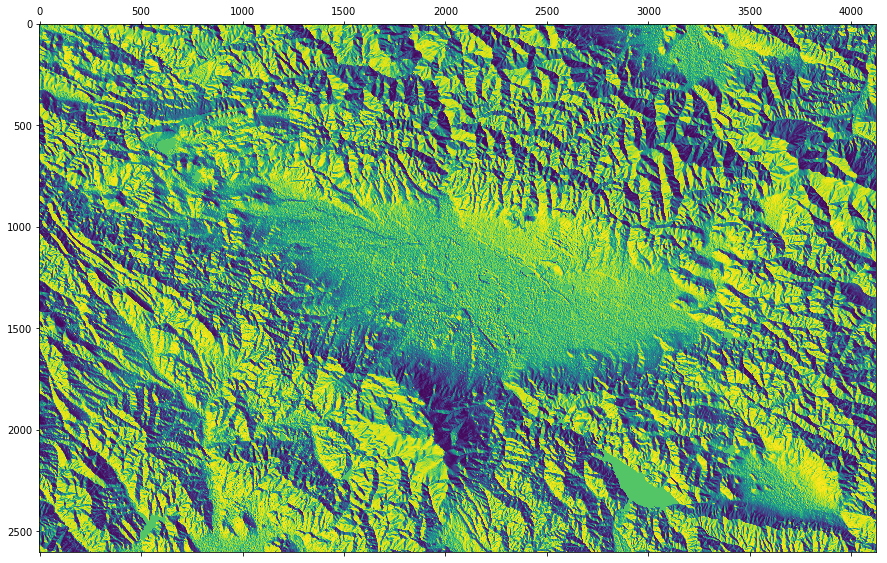

In [75]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.matshow(dem_sofia_hs)